In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load csv file
df = pd.read_csv('cycle_test(output).csv')
df.head()

,Timestamp,Data
0,12/12/2024 21:55,784.28
1,12/12/2024 21:55,784.30
2,12/12/2024 21:55,784.30
3,12/12/2024 21:55,784.25
4,12/12/2024 21:55,784.29


In [33]:
# find local maxima in data
window = 100
df['max'] = df['Data'].rolling(window=window).apply(lambda x: x[window//2] if x[window//2] > max(x[:window//2]) and x[window//2] > max(x[window//2+1:]) else np.nan, raw=True)

# find local minima in data
df['min'] = df['Data'].rolling(window=window).apply(lambda x: x[window//2] if x[window//2] < min(x[:window//2]) and x[window//2] < min(x[window//2+1:]) else np.nan, raw=True)

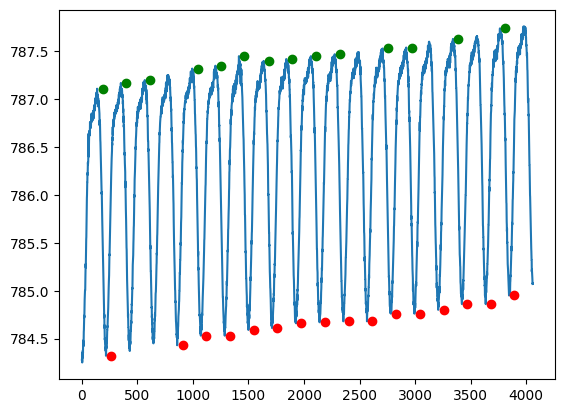

In [34]:
# plot data
plt.plot(df['Data'])
plt.plot(df['max'], 'go')
plt.plot(df['min'], 'ro')
plt.show()


In [38]:
# median number of readings between maxima
print(df['max'].dropna().index.to_series().diff().median())

# median number of readings between minima
print(df['min'].dropna().index.to_series().diff().median())

# median number of readings between maxima and minima
print(df['max'].dropna().index.to_series().diff().median() + df['min'].dropna().index.to_series().diff().median())



215.0
214.0
429.0


In [64]:
# add column counting up to 215/2 and back down repeating
seq = np.arange(215//2)
seq2 = np.arange(215//2, 0, -1)
seq = np.concatenate((seq, seq2))
# print(seq)
df['count'] = df.index % 214
df['pos'] = df['count'].apply(lambda x: seq[x])

# # df['count'] = df.index % 215
df



,Timestamp,Data,max,min,count,pos
0,12/12/2024 21:55,784.28,NaN,NaN,0,0
1,12/12/2024 21:55,784.30,NaN,NaN,1,1
2,12/12/2024 21:55,784.30,NaN,NaN,2,2
3,12/12/2024 21:55,784.25,NaN,NaN,3,3
4,12/12/2024 21:55,784.29,NaN,NaN,4,4
...,...,...,...,...,...,...
4056,12/12/2024 22:01,785.13,NaN,NaN,204,10
4057,12/12/2024 22:01,785.09,NaN,NaN,205,9
4058,12/12/2024 22:01,785.07,NaN,NaN,206,8
4059,12/12/2024 22:01,785.08,NaN,NaN,207,7


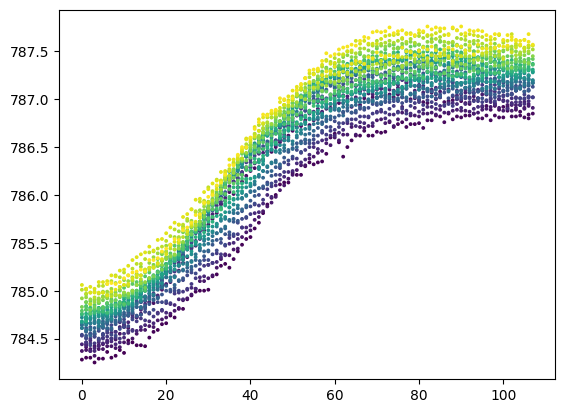

In [ ]:
# scatter plot data vs count, color is index
plt.scatter(df['pos'], df['Data'], c=df.index, s=3, cmap='bwr')